In [1]:
import numpy as np
import matplotlib.pyplot as plt
import simulations
from functools import partial
import os

In [2]:
results_path = os.getcwd() + '/figures_SCM/'

## Scalar Capacity Model

Scalar Capacity Model (Gharibi et al., 2021):
$$\dot{x_{i}}=V_{i}\Big[1-\frac{1}{\kappa}\cdot \sum_{0\leq j <i}\exp\Big(\frac{x_{i}-x_{j}}{\omega}\Big)\Big]$$

### Situation 1: drones are sorted according to their maximal velocities.

In [3]:
opt = np.array([5,4,3,2,1])
kap = 10
om = 10
d = partial(simulations.derivative_scalar_capacity, optimal_velocity=opt, kappa=kap, omega=om)

In [4]:
t, v = simulations.euler(initial_time=0, end_time=8, number_of_points=1000000, initial_value=np.array([4,3,2,1,0]), derivative=d)

/tmp/ipykernel_7641/2566908489.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/tmp/ipykernel_7641/2566908489.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(results_path + 'sym1.png', dpi=400)


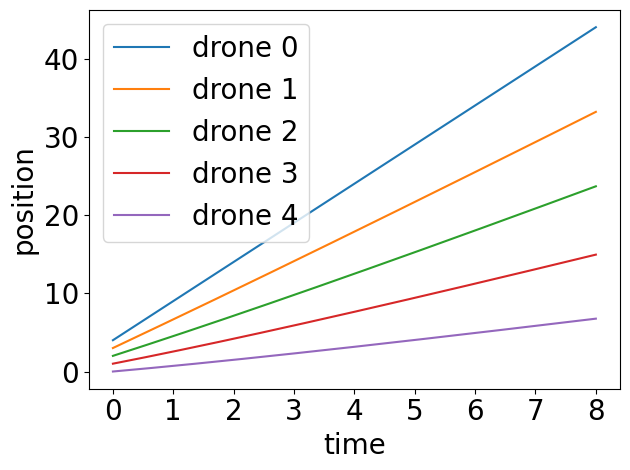

In [8]:
for i in range(5):
    plt.plot(t, v[:,i], label = 'drone ' + str(i))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("time",fontsize=20)
plt.ylabel("position",fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig(results_path + 'SCM_sym1.png', dpi=400)

### Situation 2: drones are not sorted according to their maximal velocities.

In [9]:
opt = np.array([1,2,3,4,5])
kap = 10
om = 10
d = partial(simulations.derivative_scalar_capacity, optimal_velocity=opt, kappa=kap, omega=om)

In [10]:
t, v = simulations.euler(initial_time=0, end_time=8, number_of_points=1000000, initial_value=np.array([4,3,2,1,0]), derivative=d)

/tmp/ipykernel_7641/852787972.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


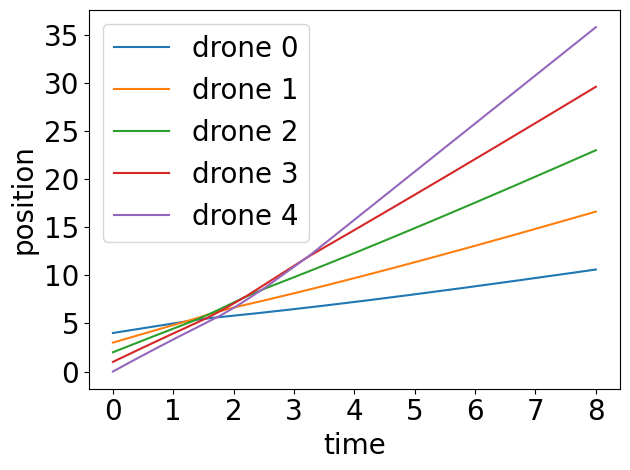

In [11]:
for i in range(5):
    plt.plot(t, v[:,i], label = 'drone ' + str(i))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("time",fontsize=20)
plt.ylabel("position",fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig(results_path + 'SCM_sym2.png', dpi=400)

### Situation 4: the first drone is very slow.

In [14]:
opt = np.array([0.01,2,3,4,5])
kap = 10
om = 10
d = partial(simulations.derivative_scalar_capacity, optimal_velocity=opt, kappa=kap, omega=om)

In [15]:
t, v = simulations.euler(initial_time=0, end_time=1.3, number_of_points=1000000, initial_value=np.array([4,3,2,1,0]), derivative=d)

/tmp/ipykernel_4265/3382026191.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/tmp/ipykernel_4265/3382026191.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(results_path + 'sym4.png', dpi=400)


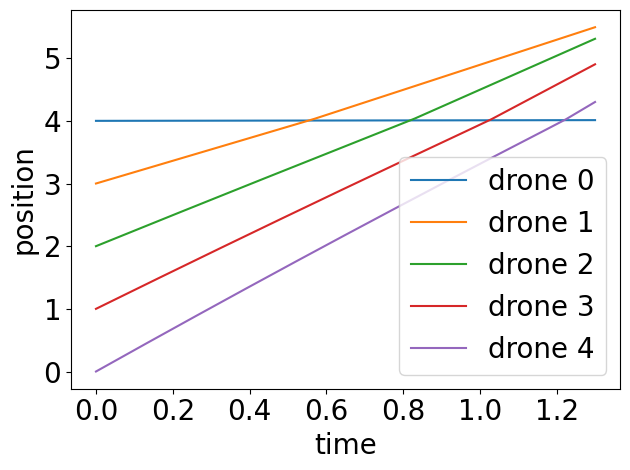

In [16]:
for i in range(5):
    plt.plot(t, v[:, i], label = 'drone ' + str(i))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("time",fontsize=20)
plt.ylabel("position",fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig(results_path + 'SCM_sym4.png', dpi=400)

### Situation 5: some complicated situation with lots of overtaking.

In [17]:
opt = np.array([7,10,3,5,2])
kap = 10
om = 10
d = partial(simulations.derivative_scalar_capacity, optimal_velocity=opt, kappa=kap, omega=om)

In [20]:
t, v = simulations.euler(initial_time=0, end_time=5, number_of_points=1000000, initial_value=np.array([4,3,2,1,0]), derivative=d)

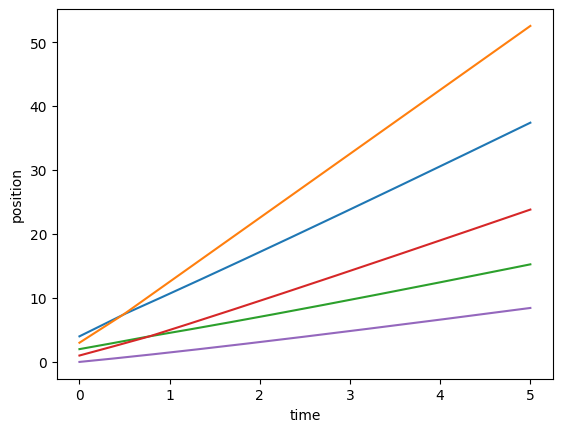

In [21]:
for i in range(5):
    plt.plot(t, v[:,i])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### Situation 6: ,,stationary'' state

In [22]:
from textwrap import wrap

In [23]:
opt = np.array([1,2,2,2,2])
kap = 10
om = 10
d = partial(simulations.derivative_scalar_capacity, optimal_velocity=opt, kappa=kap, omega=om)

In [24]:
t, v = simulations.euler(initial_time=0, end_time=200, number_of_points=1000000, initial_value=np.array([4,3,2,1,0]), derivative=d)

/tmp/ipykernel_4265/1480659945.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/tmp/ipykernel_4265/1480659945.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(results_path + 'SCM_st_st_1.png', dpi=400)


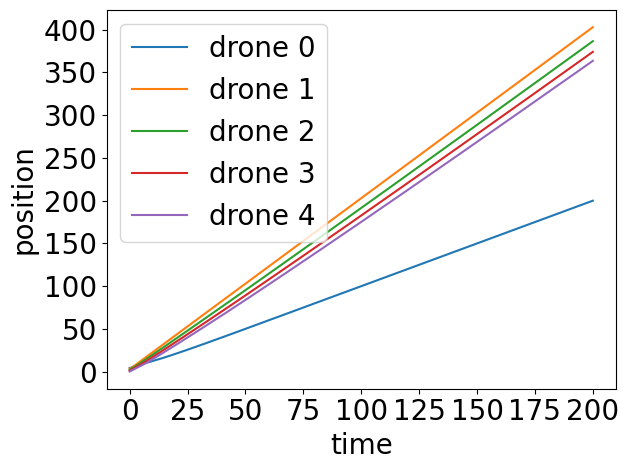

In [25]:
for i in range(5):
    plt.plot(t, v[:,i], label = 'drone ' + str(i))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("time",fontsize=20)
plt.ylabel("position",fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig(results_path + 'SCM_st_st_1.png', dpi=400)

### Situation 7: passing static obstacle.

In [26]:
opt = np.array([1, 1e-10])
kap = 10
om = 10
d = partial(simulations.derivative_scalar_capacity, optimal_velocity=opt, kappa=kap, omega=om)

In [27]:
t, v = simulations.euler(initial_time=0, end_time=50, number_of_points=1000000, initial_value=np.array([0,5]), derivative=d)

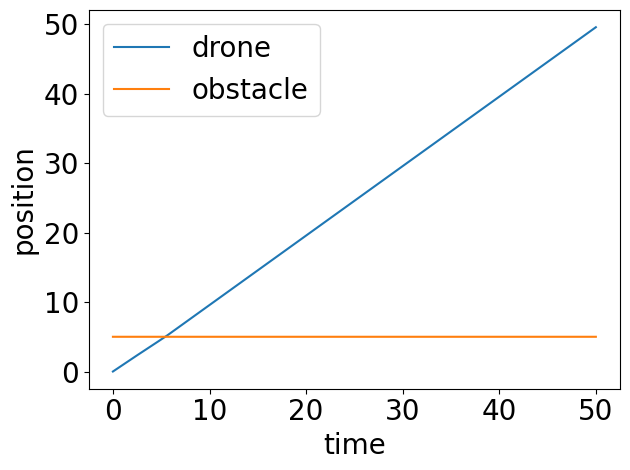

In [28]:
fig, ax = plt.subplots()
ax.plot(t,v[:,0], label='drone')
plt.plot(t, v[:,1], label='obstacle')
leg = ax.legend(fontsize=20)
plt.xlabel('time',fontsize=20)
plt.ylabel('position',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig(results_path + 'SCM_obstacle.png', dpi=400)

### Situation 8: 100 drones

In [38]:
opt_obstacles = np.repeat(0, 5)
opt = np.repeat(10, 100)
opt = np.concatenate([opt_obstacles, opt])
kap = 10
om = 30
d = partial(simulations.derivative_scalar_capacity, optimal_velocity=opt, kappa=kap, omega=om)

In [39]:
initial_positions = np.concatenate([np.array([270, 220, 170, 120, 70]), np.linspace(30, 0, 100)])

In [40]:
t, v = simulations.euler(initial_time=0, end_time=1400, number_of_points=1000000, initial_value=initial_positions, derivative=d)
#around 15 minutes

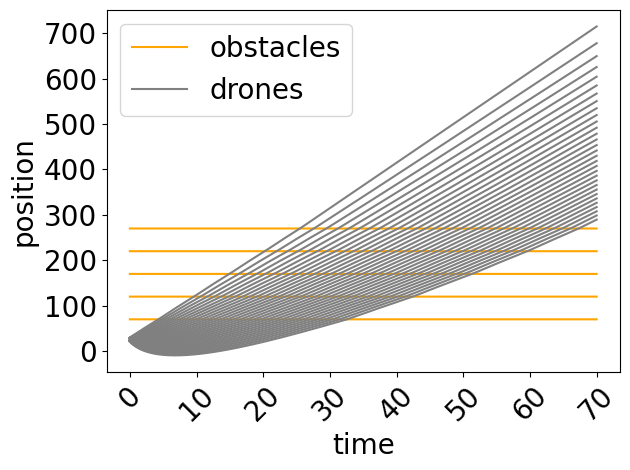

In [43]:
time_limit = 50000
# obstacles
plt.plot(t[:time_limit], v[:time_limit,0], color='orange', label='obstacles')
for i in range(1, 5):
    plt.plot(t[:time_limit], v[:time_limit,i], color='orange')
    
# drones
plt.plot(t[:time_limit], v[:time_limit,5], color='grey', label='drones')
for i in range(6, 36):
    plt.plot(t[:time_limit], v[:time_limit,i], color='grey')
    
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.xlabel("time", fontsize=20)
plt.ylabel("position", fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig(results_path + 'SCM_macro4.png', dpi=400)